[Reference](https://max-coding.medium.com/extract-structured-data-from-wikidata-using-python-and-sparql-query-987c3bff97be)

https://query.wikidata.org/#SELECT%20DISTINCT%20%3FcityLabel%20%3Fpopulation%20%3Fgps%0AWHERE%0A%7B%0A%20%20%3Fcity%20wdt%3AP31%2Fwdt%3AP279%2a%20wd%3AQ515%20.%0A%20%20%3Fcity%20wdt%3AP1082%20%3Fpopulation%20.%0A%20%20%3Fcity%20wdt%3AP625%20%3Fgps%20.%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22%20.%0A%20%20%7D%0A%7D%0AORDER%20BY%20DESC%28%3Fpopulation%29%20LIMIT%20100

In [1]:
!pip install mkwikidata

     |████████████████████████████████| 62 kB 723 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import mkwikidata
query = """
SELECT DISTINCT ?cityLabel ?population ?gps
WHERE
{
  ?city wdt:P31/wdt:P279* wd:Q515 .
  ?city wdt:P1082 ?population .
  ?city wdt:P625 ?gps .
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "en" .
  }
}
ORDER BY DESC(?population) LIMIT 100
"""
query_result = mkwikidata.run_query(query, params={ })

In [3]:
data = [{"name" : x["cityLabel"]["value"], "population" : int(x["population"]["value"])} for x in query_result["results"]["bindings"]]

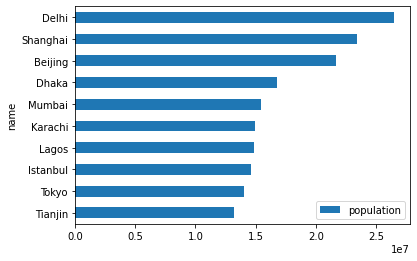

In [4]:
import pandas as pd
pd.DataFrame(data).set_index("name").head(10).plot.barh().invert_yaxis()